In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [17]:
#df_healthIndicators = pd.read_csv('health-indicators-for-south-africa-2.csv')
df_indicators = pd.read_csv('indicators_zaf.csv', header=0, index_col=2)
#df_educationIndicators = pd.read_csv('education-indicators-for-south-africa-1.csv')
df_quickCharts = pd.read_csv('quickcharts-combined-indicators-for-south-africa-1.csv', index_col=2)

In [18]:
df_quickCharts.head()
df_quickCharts.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1,inplace = True)


df_quickCharts.head()

,Indicator Name,Value
Year,,
2017,"School enrollment, primary (% gross)",100.8647
2016,"School enrollment, primary (% gross)",103.1850
2015,"School enrollment, primary (% gross)",105.5704
2014,"School enrollment, primary (% gross)",102.7050
2013,"School enrollment, primary (% gross)",102.6704


In [19]:

df_quickCharts['Value'] = df_quickCharts['Value'].astype(float)
df_quickCharts.head()

,Indicator Name,Value
Year,,
2017,"School enrollment, primary (% gross)",100.8647
2016,"School enrollment, primary (% gross)",103.1850
2015,"School enrollment, primary (% gross)",105.5704
2014,"School enrollment, primary (% gross)",102.7050
2013,"School enrollment, primary (% gross)",102.6704


In [20]:
df_pivot_QC = df_quickCharts.pivot_table(values='Value', index=df_quickCharts.index, columns = 'Indicator Name')
display(df_pivot_QC)

Indicator Name,"Life expectancy at birth, total (years)","Population, total","School enrollment, primary (% gross)"
Year,,,
1960,48.406,17099840.0,NaN
1961,48.777,17524533.0,NaN
1962,49.142,17965725.0,NaN
1963,49.509,18423161.0,NaN
1964,49.888,18896307.0,NaN
1965,50.284,19384841.0,NaN
1966,50.705,19888250.0,NaN
1967,51.148,20406864.0,NaN
1968,51.615,20942145.0,NaN


In [21]:
#df_healthIndicators.head()
df_indicators.head()
#df_educationIndicators
#df_quickCharts.head()


,Country Name,Country ISO3,Indicator Name,Indicator Code,Value
Year,,,,,
2004,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,63200.0
2003,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,65475.0
2002,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,67750.0
2001,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,70025.0
2000,South Africa,ZAF,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,72300.0


In [22]:
df_indicators.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1,inplace = True)

display(df_indicators.head())
#

,Indicator Name,Value
Year,,
2004,"Agricultural machinery, tractors",63200.0
2003,"Agricultural machinery, tractors",65475.0
2002,"Agricultural machinery, tractors",67750.0
2001,"Agricultural machinery, tractors",70025.0
2000,"Agricultural machinery, tractors",72300.0


In [23]:
df_indicators['Value'] = df_indicators['Value'].astype(float)

In [24]:
df_pivot = df_indicators.pivot_table(values='Value', index=df_indicators.index, columns = 'Indicator Name')
display(df_pivot)

Indicator Name,Total fertility rate (TFR) (births per woman): Q1 (lowest),Total fertility rate (TFR) (births per woman): Q2,Total fertility rate (TFR) (births per woman): Q3,Total fertility rate (TFR) (births per woman): Q4,Total fertility rate (TFR) (births per woman): Q5 (highest),5-bank asset concentration,A woman can apply for a passport in the same way as a man (1=yes; 0=no),A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),...,Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women with a national identity card or equivalent foundational identity document (% of women ages 15+),Women's share of population ages 15+ living with HIV (%),Working capital financed by banks (%),Young people (ages 15-24) newly infected with HIV,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)"
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,3.1,2.9,2.7,2.3,2.1,98.8359,1.0,1.0,1.0,1.0,...,0.9,3.6,NaN,64.6,NaN,100000.0,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,98.4736,1.0,1.0,1.0,1.0,...,NaN,NaN,90.78243,64.8,NaN,90000.0,33.01159,464102.0,153207.0,310894.0
2018,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,65.0,NaN,78000.0,NaN,NaN,NaN,NaN


In [25]:
df_corr = df_pivot.corr()
#df_corr.to_csv('out_corr.csv', index=True)

In [26]:
df_un_GDP = df_pivot[['GDP (current US$)','Unemployment, total (% of total labor force) (modeled ILO estimate)']]
df_un_GDP.reset_index(inplace=True)
df_un_GDP.head()

Indicator Name,Year,GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,1960,7.575397e+09,NaN
1,1961,7.972997e+09,NaN
2,1962,8.497997e+09,NaN
3,1963,9.423396e+09,NaN
4,1964,1.037400e+10,NaN


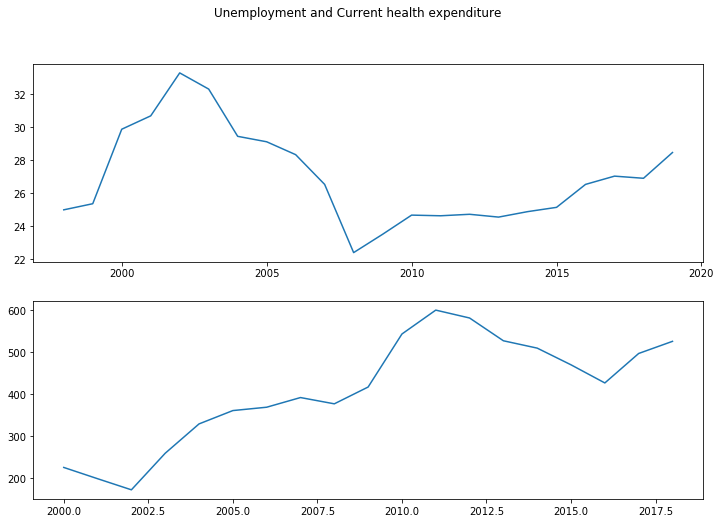

In [28]:
fig, axs = plt.subplots(2,figsize=(12,8))
fig.suptitle('Unemployment and Current health expenditure')
axs[0].plot(df_un_GDP['Year'],df_pivot['Unemployment, total (% of total labor force) (national estimate)'])
axs[1].plot(df_un_GDP['Year'],df_pivot['Current health expenditure per capita (current US$)'])
plt.show()

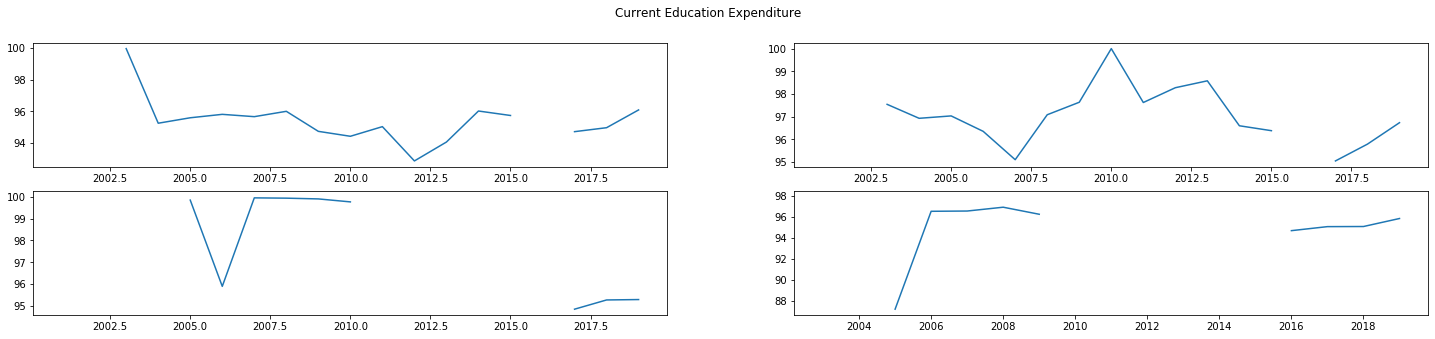

In [29]:
fig, axs = plt.subplots(2,2,figsize=(25,5))
fig.suptitle('Current Education Expenditure')
axs[0,0].plot(df_un_GDP['Year'],df_pivot['Current education expenditure, primary (% of total expenditure in primary public institutions)'])
axs[0,1].plot(df_un_GDP['Year'],df_pivot['Current education expenditure, secondary (% of total expenditure in secondary public institutions)'])
axs[1,0].plot(df_un_GDP['Year'],df_pivot['Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)'])
axs[1,1].plot(df_un_GDP['Year'],df_pivot['Current education expenditure, total (% of total expenditure in public institutions)'])
plt.show()

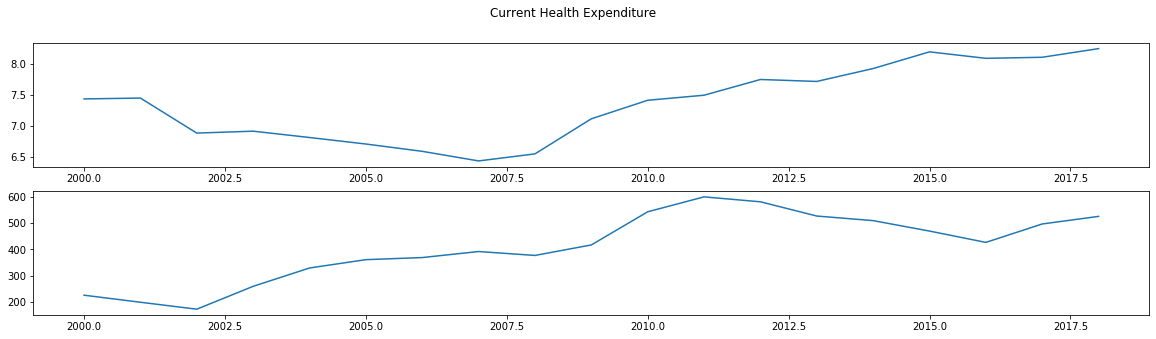

In [30]:
fig, axs = plt.subplots(2,figsize=(20,5))
fig.suptitle('Current Health Expenditure')
axs[0].plot(df_un_GDP['Year'],df_pivot['Current health expenditure (% of GDP)'])
axs[1].plot(df_un_GDP['Year'],df_pivot['Current health expenditure per capita (current US$)'])

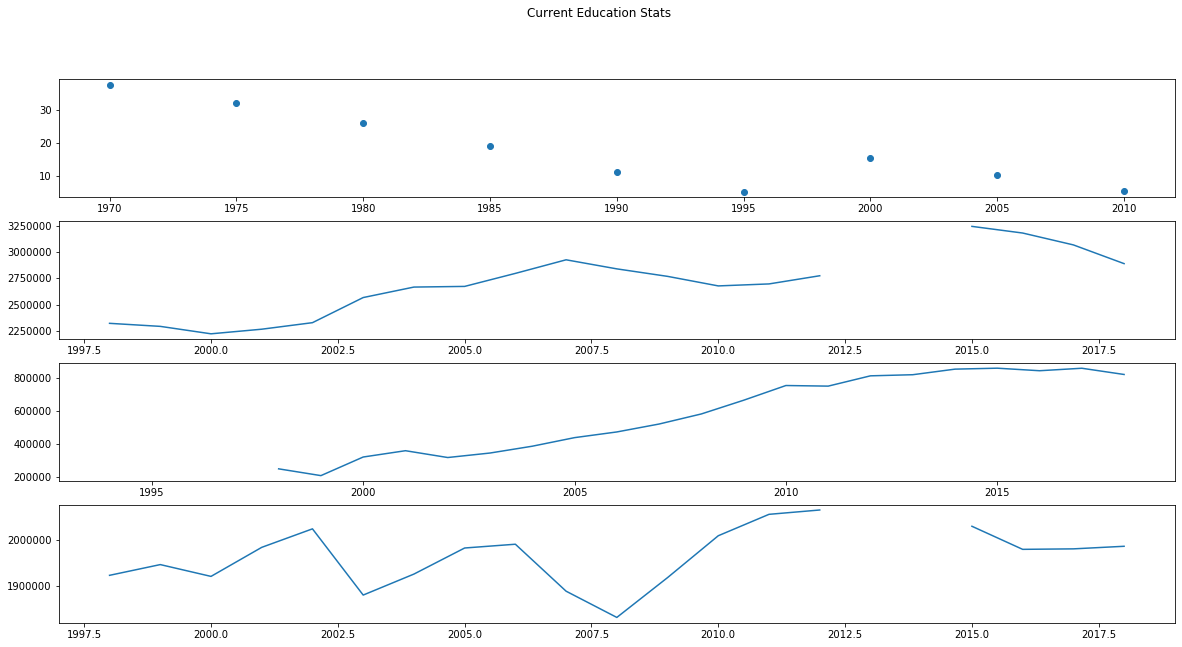

In [31]:
fig, axs = plt.subplots(4,figsize=(20,10))
fig.suptitle('Current Education Stats')
axs[0].scatter(df_un_GDP['Year'],df_pivot['Barro-Lee: Percentage of population age 15+ with no education'])
axs[1].plot(df_un_GDP['Year'],df_pivot['Enrolment in upper secondary education, both sexes (number)'])
axs[2].plot(df_un_GDP['Year'],df_pivot['Enrolment in pre-primary education, both sexes (number)'])
axs[3].plot(df_un_GDP['Year'],df_pivot['Enrolment in lower secondary education, both sexes (number)'])


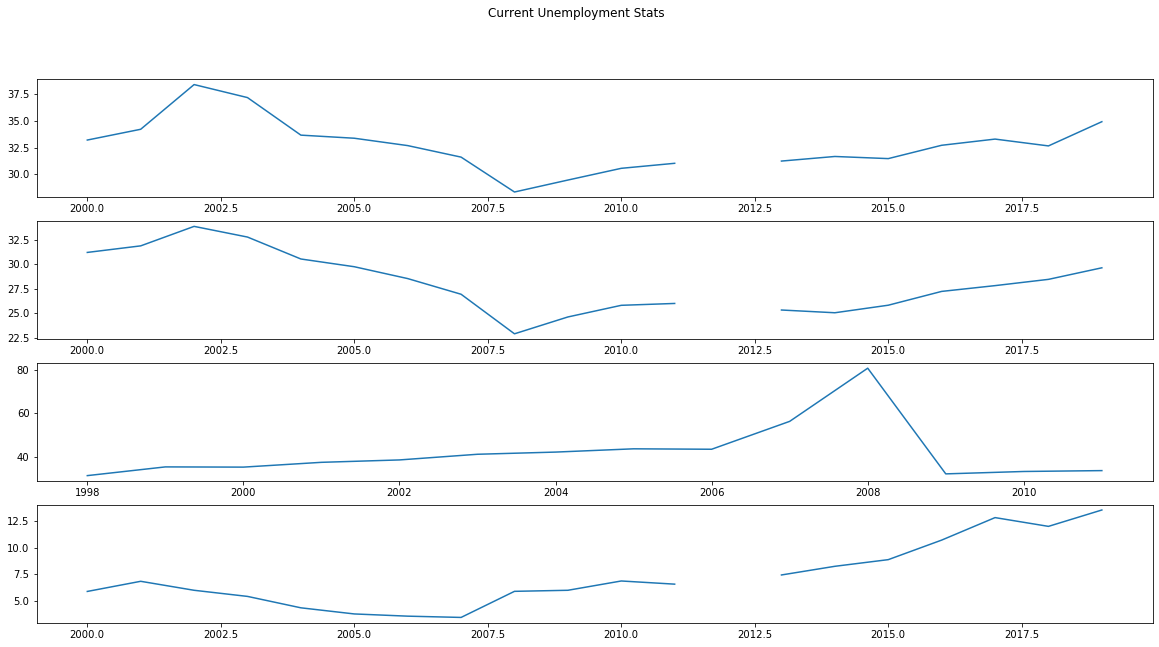

In [32]:
fig, axs = plt.subplots(4,figsize=(20,10))
fig.suptitle('Current Unemployment Stats')
axs[0].plot(df_un_GDP['Year'],df_pivot['Unemployment with basic education (% of total labor force with basic education)'])
axs[1].plot(df_un_GDP['Year'],df_pivot['Unemployment with intermediate education (% of total labor force with intermediate education)'])
axs[2].plot(df_un_GDP['Year'],df_pivot['Unemployment with secondary education (% of total unemployment)'])
axs[3].plot(df_un_GDP['Year'],df_pivot['Unemployment with advanced education (% of total labor force with advanced education)'])

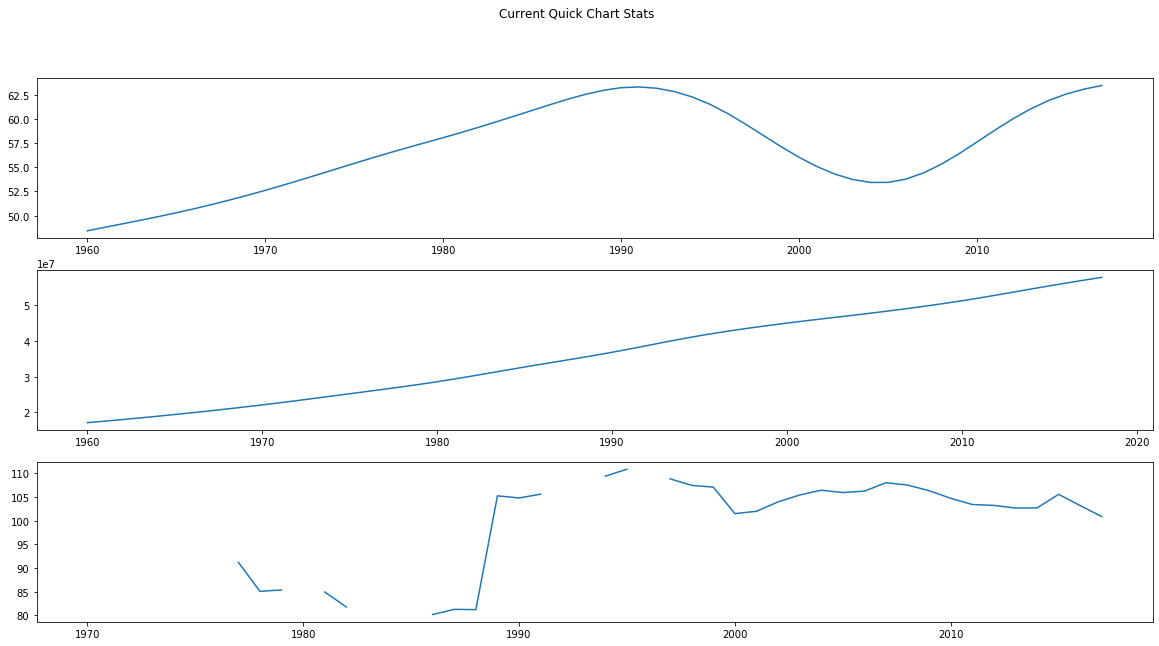

In [33]:
fig, axs = plt.subplots(3,figsize=(20,10))
fig.suptitle('Current Quick Chart Stats')
axs[0].plot(df_pivot_QC.index,df_pivot_QC['Life expectancy at birth, total (years)'])
axs[1].plot(df_pivot_QC.index,df_pivot_QC['Population, total'])
axs[2].plot(df_pivot_QC.index,df_pivot_QC['School enrollment, primary (% gross)'])


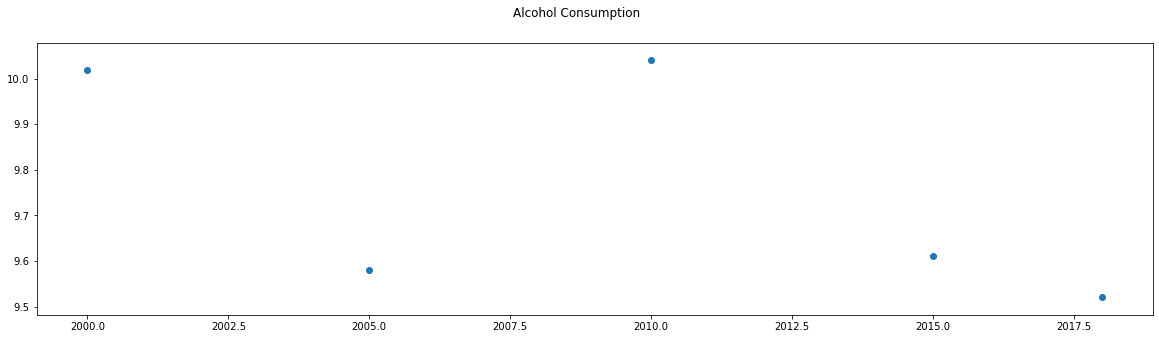

In [43]:
fig, axs = plt.subplots(1,figsize=(20,5))
fig.suptitle('Alcohol Consumption')
axs.scatter(df_pivot.index,df_pivot['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'])

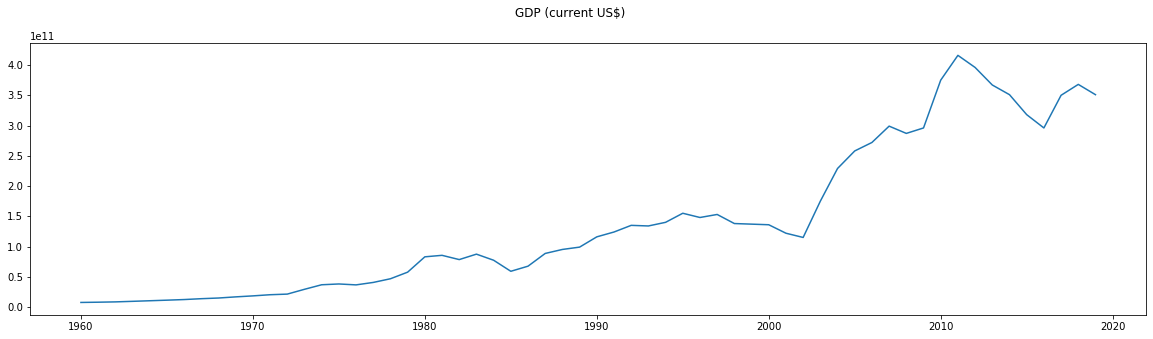

In [42]:
fig, axs = plt.subplots(1,figsize=(20,5))
fig.suptitle('GDP (current US$)')
axs.plot(df_pivot.index,df_pivot['GDP (current US$)'])

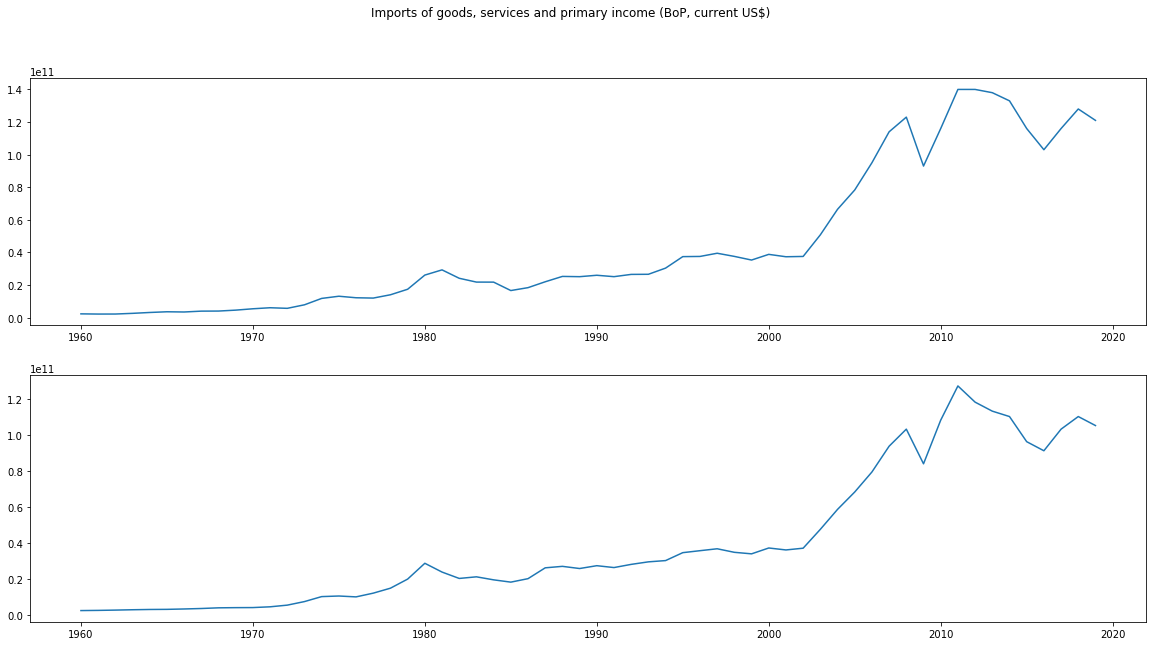

In [50]:
fig, axs = plt.subplots(2,figsize=(20,10))
fig.suptitle('Imports of goods, services and primary income (BoP, current US$)')
axs[0].plot(df_pivot.index,df_pivot['Imports of goods, services and primary income (BoP, current US$)'])
axs[1].plot(df_pivot.index,df_pivot['Exports of goods and services (BoP, current US$)'])

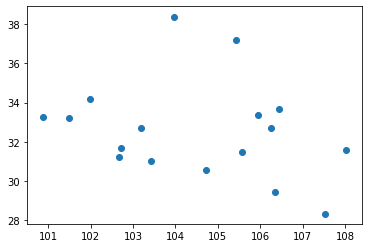

In [56]:
plt.scatter(df_pivot_QC['School enrollment, primary (% gross)'],df_pivot['Unemployment with basic education (% of total labor force with basic education)'].iloc[:-2])

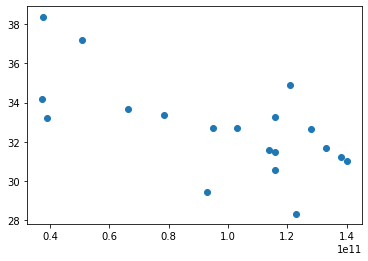

In [51]:
plt.scatter(df_pivot['Imports of goods, services and primary income (BoP, current US$)'],df_pivot['Unemployment with basic education (% of total labor force with basic education)'])

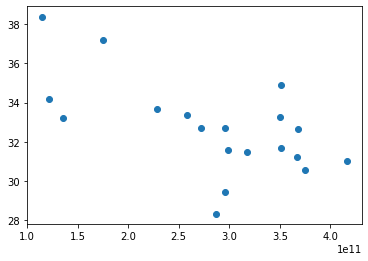

In [52]:
plt.scatter(df_pivot['GDP (current US$)'],df_pivot['Unemployment with basic education (% of total labor force with basic education)'])